## Plotting end of century DJF and JJA meridional streamfunction 

In [1]:
# Import functions
import warnings 
warnings.filterwarnings('ignore')
import os
import iris
import iris.cube
import cf_units
import numpy as np
import numpy.ma as ma
import xarray as xr
from scipy import stats
import regionmask
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec

ERROR 1: PROJ: proj_create_from_database: Open of /home/h05/awells/.conda/envs/env/share/proj failed


## Load and process DJF data

In [2]:
# file path
path = '/data/users/awells/geoMIP/processed_data/UKESM1_Monthly_meridional_streamfunc_full_'

ssp245 = xr.open_dataarray(path + 'ssp245_2020-2100.nc')
ssp585 = xr.open_dataarray(path + 'ssp585_2020-2100.nc')
g6con = xr.open_dataarray(path + 'G6controller_2020-2100.nc')
g6sulf = xr.open_dataarray(path + 'G6sulfur_2020-2100.nc')

In [3]:
ssp245_djf = ssp245.sel(time=(ssp245.time.dt.season=='DJF')).sel(time=slice('2081','2101')).mean(dim=('time','realization'))
ssp585_djf = ssp585.sel(time=(ssp585.time.dt.season=='DJF')).sel(time=slice('2081','2101')).mean(dim=('time','realization'))
g6con_djf = g6con.sel(time=(g6con.time.dt.season=='DJF')).sel(time=slice('2081','2101')).mean(dim=('time','realization'))
g6sulf_djf = g6sulf.sel(time=(g6sulf.time.dt.season=='DJF')).sel(time=slice('2081','2101')).mean(dim=('time','realization'))

In [4]:
ssp245_djf_500 = ssp245_djf.where(ssp245_djf['pressure'] == 500, drop=True).squeeze()
ssp585_djf_500 = ssp585_djf.where(ssp585_djf['pressure'] == 500, drop=True).squeeze()
g6con_djf_500 = g6con_djf.where(g6con_djf['pressure'] == 500, drop=True).squeeze()
g6sulf_djf_500 = g6sulf_djf.where(g6sulf_djf['pressure'] == 500, drop=True).squeeze()

In [5]:
ssp245_jja = ssp245.sel(time=(ssp245.time.dt.season=='JJA')).sel(time=slice('2081','2101')).mean(dim=('time','realization'))
ssp585_jja = ssp585.sel(time=(ssp585.time.dt.season=='JJA')).sel(time=slice('2081','2101')).mean(dim=('time','realization'))
g6con_jja = g6con.sel(time=(g6con.time.dt.season=='JJA')).sel(time=slice('2081','2101')).mean(dim=('time','realization'))
g6sulf_jja = g6sulf.sel(time=(g6sulf.time.dt.season=='JJA')).sel(time=slice('2081','2101')).mean(dim=('time','realization'))

In [6]:
ssp245_jja_500 = ssp245_jja.where(ssp245_jja['pressure'] == 500, drop=True).squeeze()
ssp585_jja_500 = ssp585_jja.where(ssp585_jja['pressure'] == 500, drop=True).squeeze()
g6con_jja_500 = g6con_jja.where(g6con_jja['pressure'] == 500, drop=True).squeeze()
g6sulf_jja_500 = g6sulf_jja.where(g6sulf_jja['pressure'] == 500, drop=True).squeeze()

## Find location of ITCZ at 500hPa

In [7]:
def itcz(da):
    lat = da.latitude[np.where(np.abs(np.diff(np.sign(da))) == 2)][(np.abs(da.latitude[np.where(np.abs(np.diff(np.sign(da))) == 2)])).argmin()] + 0.625
    return lat

In [8]:
ssp245_djf_itcz = itcz(ssp245_djf_500)
ssp585_djf_itcz = itcz(ssp585_djf_500)
g6sulf_djf_itcz = itcz(g6sulf_djf_500)
g6con_djf_itcz = itcz(g6con_djf_500)

In [9]:
ssp245_jja_itcz = itcz(ssp245_jja_500)
ssp585_jja_itcz = itcz(ssp585_jja_500)
g6sulf_jja_itcz = itcz(g6sulf_jja_500)
g6con_jja_itcz = itcz(g6con_jja_500)

In [10]:
g6sulf_djf_diff = g6sulf_djf_itcz - ssp245_djf_itcz
g6con_djf_diff = g6con_djf_itcz - ssp245_djf_itcz

g6sulf_jja_diff = g6sulf_jja_itcz - ssp245_jja_itcz
g6con_jja_diff = g6con_jja_itcz - ssp245_jja_itcz

In [11]:
print('G6sulfur DJF shift:', g6sulf_djf_diff.values, 'G6sulfur JJA shift:', g6sulf_jja_diff.values)

G6sulfur DJF shift: -1.25 G6sulfur JJA shift: 1.25


In [12]:
print('G6controller DJF shift:', g6con_djf_diff.values, 'G6controller JJA shift:', g6con_jja_diff.values)

G6controller DJF shift: 1.25 G6controller JJA shift: 0.0


## Stream function amplitude change

In [13]:
print('SSP245 max amplitude at DJF 500hPA : ', abs(ssp245_djf_500).max().values.round(2))
print('G6sulfur max amplitude at DJF 500hPA : ', abs(g6sulf_djf_500).max().values.round(2))
print('G6controller max amplitude at DJF 500hPA : ', abs(g6con_djf_500).max().values.round(2))

SSP245 max amplitude at DJF 500hPA :  19.18
G6sulfur max amplitude at DJF 500hPA :  18.18
G6controller max amplitude at DJF 500hPA :  18.65


In [14]:
print('SSP245 max amplitude at JJA 500hPA : ', abs(ssp245_jja_500).max().values.round(2))
print('G6sulfur max amplitude at JJA 500hPA : ', abs(g6sulf_jja_500).max().values.round(2))
print('G6controller max amplitude at JJA 500hPA : ', abs(g6con_jja_500).max().values.round(2))

SSP245 max amplitude at JJA 500hPA :  22.47
G6sulfur max amplitude at JJA 500hPA :  21.48
G6controller max amplitude at JJA 500hPA :  22.06


## Calculate statistical significance

In [15]:
ssp245_djf_r = ssp245.sel(time=(ssp245.time.dt.season=='DJF')).sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(ssp245.realization)):
    ssp245_djf_r = xr.concat((ssp245_djf_r, ssp245.sel(time=(ssp245.time.dt.season=='DJF')).sel(time=slice('2081','2101')).sel(realization=i)), dim='time').transpose('time', 'latitude', 'pressure')

ssp585_djf_r = ssp585.sel(time=(ssp585.time.dt.season=='DJF')).sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(ssp585.realization)):
    ssp585_djf_r = xr.concat((ssp585_djf_r, ssp585.sel(time=(ssp585.time.dt.season=='DJF')).sel(time=slice('2081','2101')).sel(realization=i)), dim='time').transpose('time', 'latitude', 'pressure')

g6sulf_djf_r = g6sulf.sel(time=(g6sulf.time.dt.season=='DJF')).sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(g6sulf.realization)):
    g6sulf_djf_r = xr.concat((g6sulf_djf_r, g6sulf.sel(time=(g6sulf.time.dt.season=='DJF')).sel(time=slice('2081','2101')).sel(realization=i)), dim='time').transpose('time', 'latitude', 'pressure')

g6con_djf_r = g6con.sel(time=(g6con.time.dt.season=='DJF')).sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(g6con.realization)):
    g6con_djf_r = xr.concat((g6con_djf_r, g6con.sel(time=(g6con.time.dt.season=='DJF')).sel(time=slice('2081','2101')).sel(realization=i)), dim='time').transpose('time', 'latitude', 'pressure')

In [16]:
stat, pval = stats.ttest_ind(ssp585_djf_r, ssp245_djf_r)
pval_djf_ssp585 = xr.DataArray(data=pval, 
                     dims=['latitude', 'pressure'], 
                     coords=dict(pressure=(['pressure'], ssp245_djf_r.pressure.values), 
                                 latitude=(['latitude'], ssp245_djf_r.latitude.values)))

stat, pval = stats.ttest_ind(g6sulf_djf_r, ssp245_djf_r)
pval_djf_g6sulf = xr.DataArray(data=pval, 
                     dims=['latitude', 'pressure'], 
                     coords=dict(pressure=(['pressure'], ssp245_djf_r.pressure.values), 
                                 latitude=(['latitude'], ssp245_djf_r.latitude.values)))

stat, pval = stats.ttest_ind(g6con_djf_r, ssp245_djf_r)
pval_djf_g6con = xr.DataArray(data=pval, 
                     dims=['latitude', 'pressure'], 
                     coords=dict(pressure=(['pressure'], ssp245_djf_r.pressure.values), 
                                 latitude=(['latitude'], ssp245_djf_r.latitude.values)))

In [17]:
ssp245_jja_r = ssp245.sel(time=(ssp245.time.dt.season=='JJA')).sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(ssp245.realization)):
    ssp245_jja_r = xr.concat((ssp245_jja_r, ssp245.sel(time=(ssp245.time.dt.season=='JJA')).sel(time=slice('2081','2101')).sel(realization=i)), dim='time').transpose('time', 'latitude', 'pressure')

ssp585_jja_r = ssp585.sel(time=(ssp585.time.dt.season=='JJA')).sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(ssp585.realization)):
    ssp585_jja_r = xr.concat((ssp585_jja_r, ssp585.sel(time=(ssp585.time.dt.season=='JJA')).sel(time=slice('2081','2101')).sel(realization=i)), dim='time').transpose('time', 'latitude', 'pressure')
    
g6sulf_jja_r = g6sulf.sel(time=(g6sulf.time.dt.season=='JJA')).sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(g6sulf.realization)):
    g6sulf_jja_r = xr.concat((g6sulf_jja_r, g6sulf.sel(time=(g6sulf.time.dt.season=='JJA')).sel(time=slice('2081','2101')).sel(realization=i)), dim='time').transpose('time', 'latitude', 'pressure')
    
g6con_jja_r = g6con.sel(time=(g6con.time.dt.season=='JJA')).sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(g6con.realization)):
    g6con_jja_r = xr.concat((g6con_jja_r, g6con.sel(time=(g6con.time.dt.season=='JJA')).sel(time=slice('2081','2101')).sel(realization=i)), dim='time').transpose('time', 'latitude', 'pressure')

In [18]:
stat, pval = stats.ttest_ind(ssp585_jja_r, ssp245_jja_r)
pval_jja_ssp585 = xr.DataArray(data=pval, 
                     dims=['latitude', 'pressure'], 
                     coords=dict(pressure=(['pressure'], ssp245_jja_r.pressure.values), 
                                 latitude=(['latitude'], ssp245_jja_r.latitude.values)))

stat, pval = stats.ttest_ind(g6sulf_jja_r, ssp245_jja_r)
pval_jja_g6sulf = xr.DataArray(data=pval, 
                     dims=['latitude', 'pressure'], 
                     coords=dict(pressure=(['pressure'], ssp245_jja_r.pressure.values), 
                                 latitude=(['latitude'], ssp245_jja_r.latitude.values)))

stat, pval = stats.ttest_ind(g6con_jja_r, ssp245_jja_r)
pval_jja_g6con = xr.DataArray(data=pval, 
                     dims=['latitude', 'pressure'], 
                     coords=dict(pressure=(['pressure'], ssp245_jja_r.pressure.values), 
                                 latitude=(['latitude'], ssp245_jja_r.latitude.values)))

## Plotting

In [23]:
params = {'legend.fontsize': 20,
          'axes.labelsize': 45,
          'axes.titlesize': 35,
          'axes.linewidth': 8,
          'xtick.labelsize': 35,
          'ytick.labelsize': 35,
          'xtick.major.size': 8,
          'ytick.major.size': 8,
          'axes.grid': True}

plt.rcParams.update(params)

def autosize_figure(nrows, ncolumns, scale_factor=1, xscale_factor=1, yscale_factor=1):
    xwidth = (ncolumns+0.67) * 5.0 * scale_factor * xscale_factor
    ylength = (nrows+0.67) * 3.6 * scale_factor * yscale_factor
    return (xwidth, ylength)

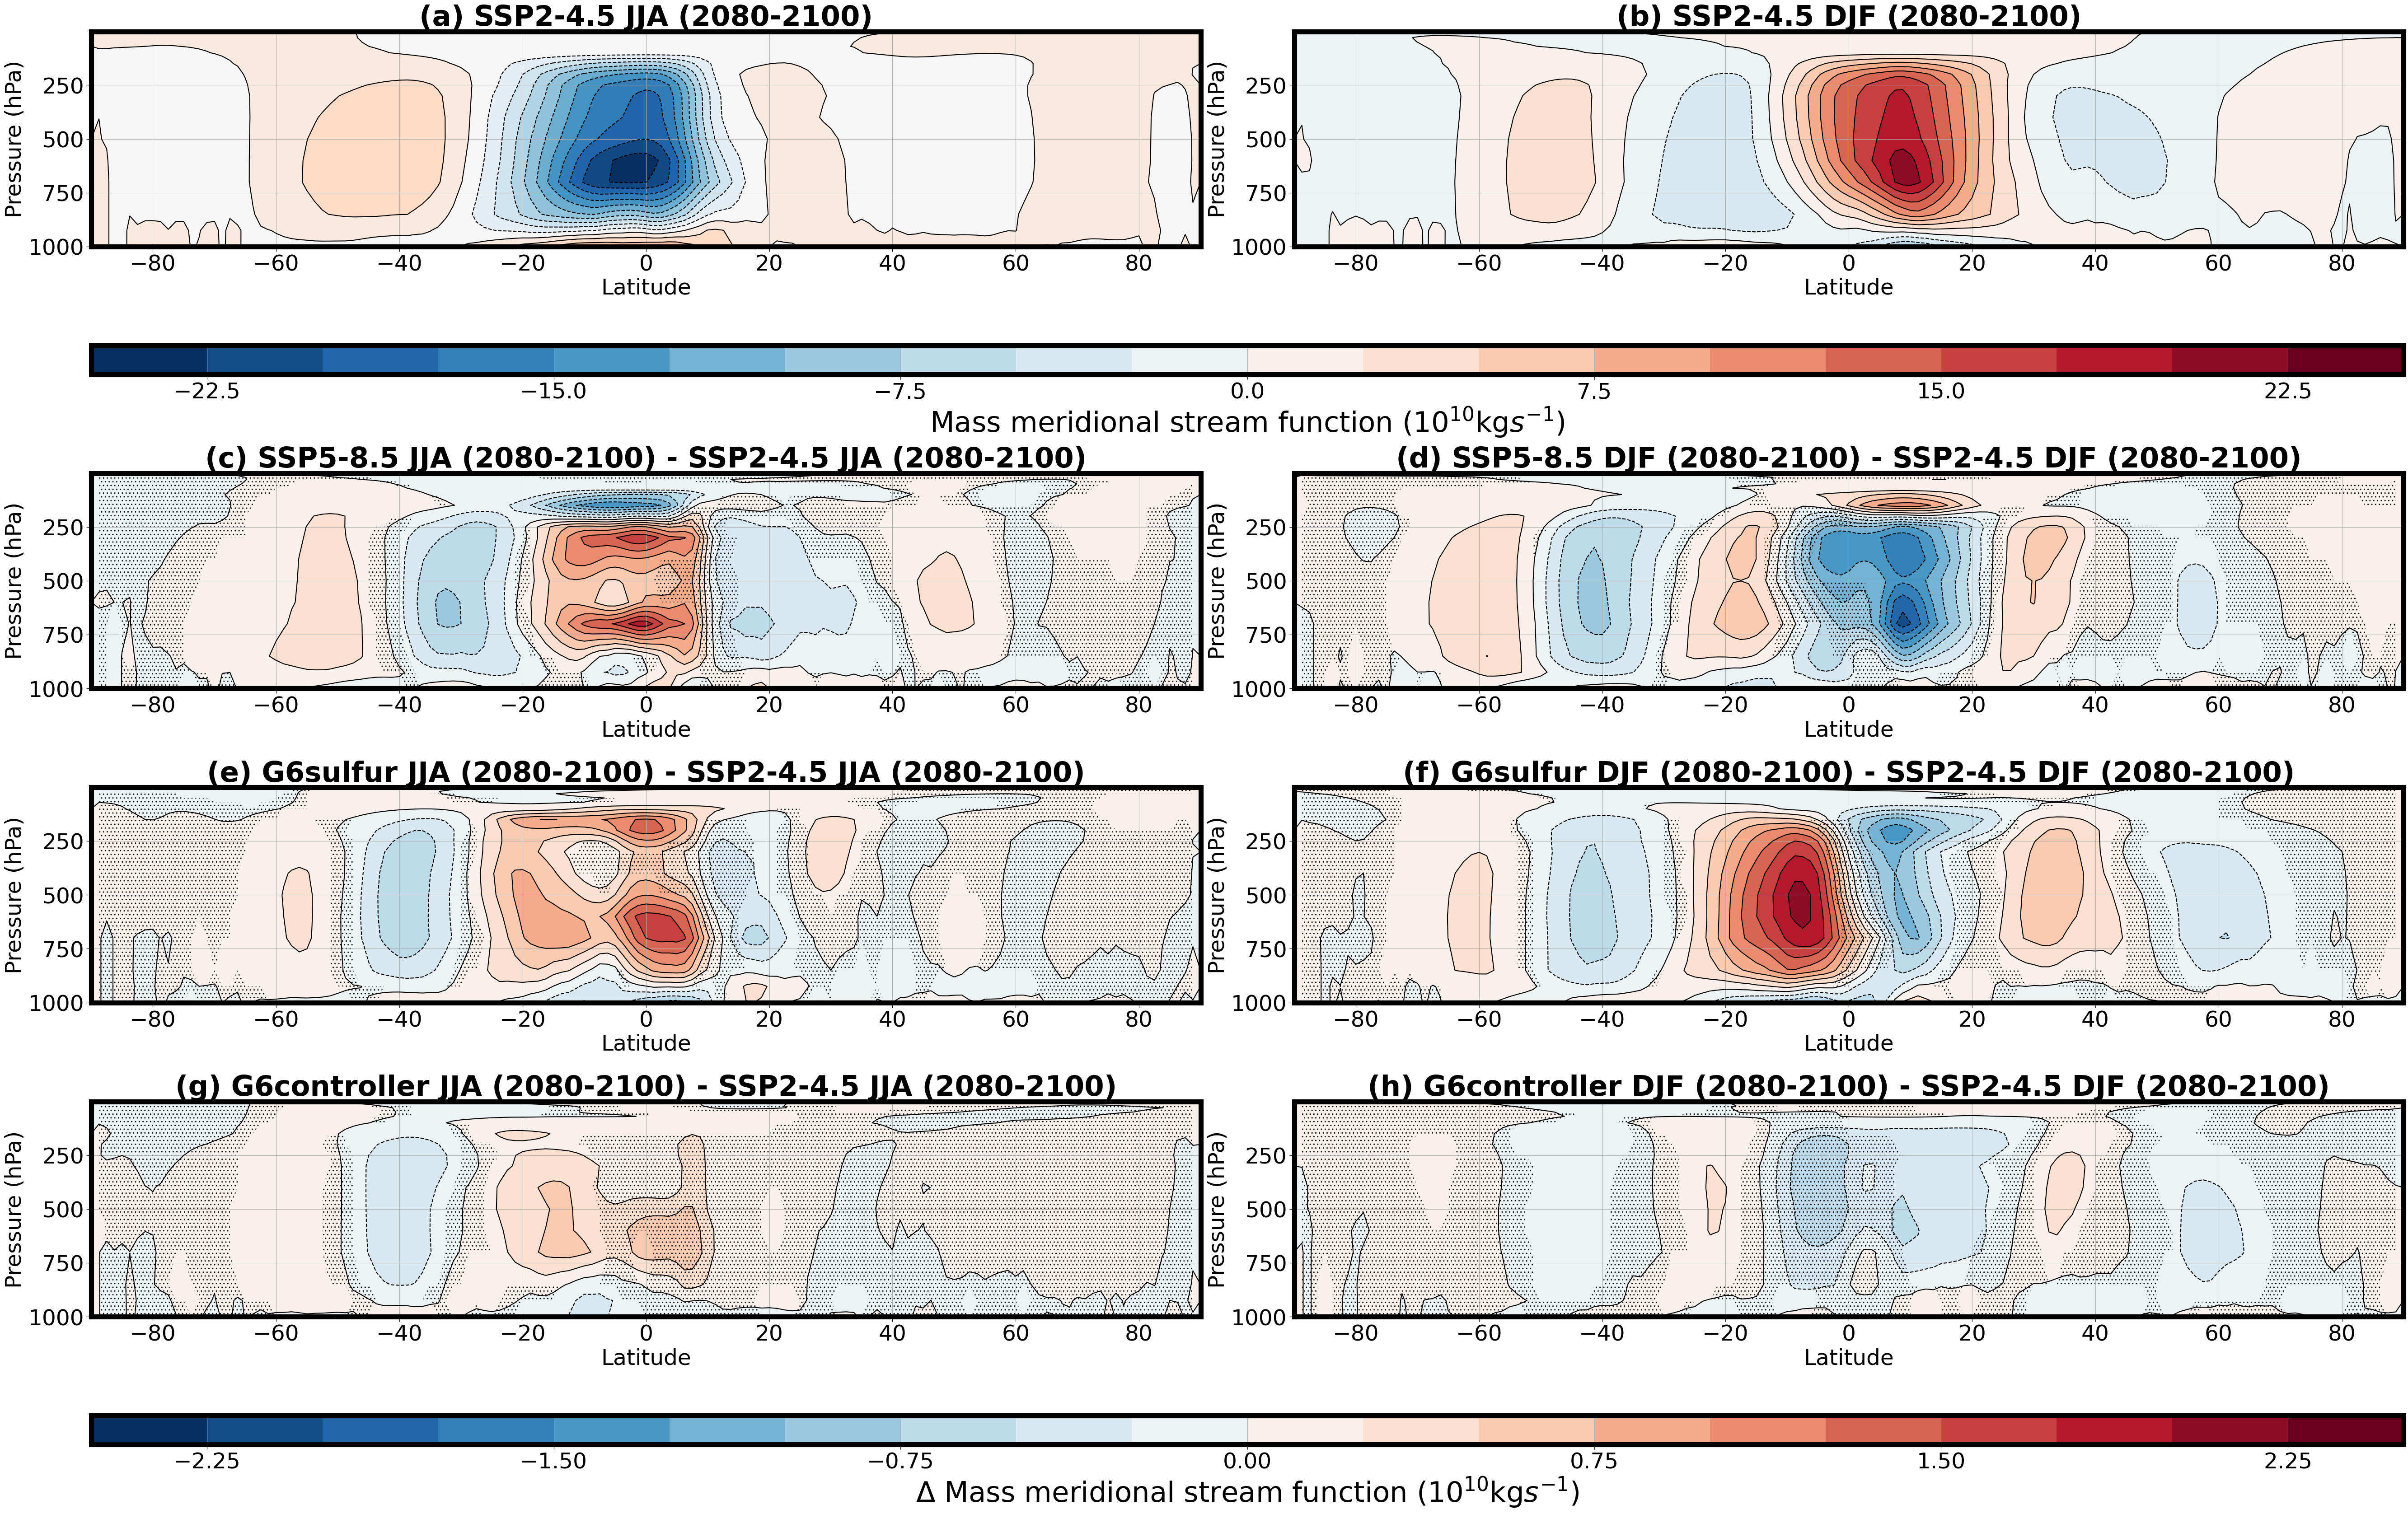

In [24]:
col_map = mpl_cm.get_cmap('RdBu_r')

fig = plt.figure(figsize=autosize_figure(4, 2, scale_factor=2, xscale_factor=2))
gs = GridSpec(6, 2, height_ratios=[15, 2, 15, 15, 15, 2])

lvs = np.linspace(-25, 25, 21)

ax1 = fig.add_subplot(gs[0, 0])
ssp245_jja.transpose().plot.contourf(cmap=col_map, levels=lvs, add_colorbar=False)
ssp245_jja.transpose().plot.contour(levels=lvs, colors='k')
ax1.invert_yaxis()
plt.xlabel('Latitude', fontsize = 35)
plt.ylabel('Pressure (hPa)', fontsize = 35)
plt.title('(a) SSP2-4.5 JJA (2080-2100)', fontweight='bold', fontsize=45)

ax2 = fig.add_subplot(gs[0, 1])
cb1 = ssp245_djf.transpose().plot.contourf(cmap=col_map, levels=lvs, add_colorbar=False)
ssp245_djf.transpose().plot.contour(levels=lvs, colors='k')
ax2.invert_yaxis()
plt.xlabel('Latitude', fontsize = 35)
plt.ylabel('Pressure (hPa)', fontsize = 35)
plt.title('(b) SSP2-4.5 DJF (2080-2100)', fontweight='bold', fontsize=45)

cax1 = fig.add_subplot(gs[1, :])
col_bar = plt.colorbar(cb1, cax=cax1, orientation='horizontal')
col_bar.set_label('Mass meridional stream function ($10^{10}$kg$s^{-1}$)', fontsize=45)

lvs2 = np.linspace(-2.5, 2.5, 21)

ax3 = fig.add_subplot(gs[2, 0])
(ssp585_jja - ssp245_jja).transpose().plot.contourf(cmap=col_map, levels=lvs2, add_colorbar=False)
(ssp585_jja - ssp245_jja).transpose().plot.contour(levels=lvs2, colors='k')
pval_jja_ssp585.where(pval_jja_ssp585>0.05).transpose().plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax3.invert_yaxis()
plt.xlabel('Latitude', fontsize = 35)
plt.ylabel('Pressure (hPa)', fontsize = 35)
plt.title('(c) SSP5-8.5 JJA (2080-2100) - SSP2-4.5 JJA (2080-2100)', fontweight='bold', fontsize=45)

ax4 = fig.add_subplot(gs[2, 1])
(ssp585_djf - ssp245_djf).transpose().plot.contourf(cmap=col_map, levels=lvs2, add_colorbar=False)
(ssp585_djf - ssp245_djf).transpose().plot.contour(levels=lvs2, colors='k')
pval_djf_ssp585.where(pval_djf_ssp585>0.05).transpose().plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax4.invert_yaxis()
plt.xlabel('Latitude', fontsize = 35)
plt.ylabel('Pressure (hPa)', fontsize = 35)
plt.title('(d) SSP5-8.5 DJF (2080-2100) - SSP2-4.5 DJF (2080-2100)', fontweight='bold', fontsize=45)
                      
ax5 = fig.add_subplot(gs[3, 0])
(g6sulf_jja - ssp245_jja).transpose().plot.contourf(cmap=col_map, levels=lvs2, add_colorbar=False)
(g6sulf_jja - ssp245_jja).transpose().plot.contour(levels=lvs2, colors='k')
pval_jja_g6sulf.where(pval_jja_g6sulf>0.05).transpose().plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax5.invert_yaxis()
plt.xlabel('Latitude', fontsize = 35)
plt.ylabel('Pressure (hPa)', fontsize =35)
plt.title('(e) G6sulfur JJA (2080-2100) - SSP2-4.5 JJA (2080-2100)', fontweight='bold', fontsize=45)

ax6 = fig.add_subplot(gs[3, 1])
(g6sulf_djf - ssp245_djf).transpose().plot.contourf(cmap=col_map, levels=lvs2, add_colorbar=False)
(g6sulf_djf - ssp245_djf).transpose().plot.contour(levels=lvs2, colors='k')
pval_djf_g6sulf.where(pval_djf_g6sulf>0.05).transpose().plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax6.invert_yaxis()
plt.xlabel('Latitude', fontsize = 35)
plt.ylabel('Pressure (hPa)', fontsize = 35)
plt.title('(f) G6sulfur DJF (2080-2100) - SSP2-4.5 DJF (2080-2100)', fontweight='bold', fontsize=45)

ax7 = fig.add_subplot(gs[4, 0])
(g6con_jja - ssp245_jja).transpose().plot.contourf(cmap=col_map, levels=lvs2, add_colorbar=False)
(g6con_jja - ssp245_jja).transpose().plot.contour(levels=lvs2, colors='k')
pval_jja_g6con.where(pval_jja_g6con>0.05).transpose().plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax7.invert_yaxis()
plt.xlabel('Latitude', fontsize = 35)
plt.ylabel('Pressure (hPa)', fontsize = 35)
plt.title('(g) G6controller JJA (2080-2100) - SSP2-4.5 JJA (2080-2100)', fontweight='bold', fontsize=45)

ax8 = fig.add_subplot(gs[4, 1])
cb2 = (g6con_djf - ssp245_djf).transpose().plot.contourf(cmap=col_map, levels=lvs2, add_colorbar=False)
(g6con_djf - ssp245_djf).transpose().plot.contour(levels=lvs2, colors='k')
pval_djf_g6con.where(pval_djf_g6con>0.05).transpose().plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax8.invert_yaxis()
plt.xlabel('Latitude', fontsize = 35)
plt.ylabel('Pressure (hPa)', fontsize = 35)
plt.title('(h) G6controller DJF (2080-2100) - SSP2-4.5 DJF (2080-2100)', fontweight='bold', fontsize=45)

cax2 = fig.add_subplot(gs[5, :])
col_bar = plt.colorbar(cb2, cax=cax2, orientation='horizontal')
col_bar.set_label('$\Delta$ Mass meridional stream function ($10^{10}$kg$s^{-1}$)', fontsize=45)

plt.tight_layout()
plt.savefig('/net/home/h05/awells/PycharmProjects/G6_comparison/Plots/Wells2023/Figure8.png', dpi=200)
plt.show()